# Supervised Learning

The supervised learning is one type of machine learning, which the main goal is to learn a model from **labeled** training data that allows us to make predictions about unseen or future date. In this case, the term "supervised" refers to a set of training exemples (i.e., data inputs), where the desired output signals (i.e., labels) are already known.

Naming convention:
* Features = predictor variables = independent variables
* Target variable = dependend variable = response variable


Functions that will be used bellow:

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap

## 1. Classification for Predicting Class Labels

Classification is a subcategory of supervised learning where the goal is to predict the categorical class labels of new instances, based on past observations. Those class labels are **discrete** , unordered values that can be understood as the group memberships of the instances.

As an example of a supervised learning algorithm, we will use the **k-nearest neighbor (KNN)** classifier, which is a typical **lazy learner**. This means that it doesn't learn a discriminative function from the training data but memorized the training dataset instead.

**KNN** belongs to a subcategory of **nonparametric** models that are described as **instanced-based learning**. Models based on instanced-based learning are characterized by memorizing the training dataset, and lazy learning is a particular case of instanced-based learning that is associated with no cost during the learning process. The **KNN** algorithm itself is relatively straightforward and can be summarized by the following steps:
* 1. Choose the number of *k* and a distance metric.
* 2. Find the *k*-nearest neighbors of the data record that we want to classify.
* 3. Assign the class label by majority vote.

Note: **Nonparametric** models of machine learning algorithms are models that can't be characterized by a fixed set of parameters, and the number of parameters grows with the training data. In contrast, for **parametric** models, we estimate parameters from the training dataset to learn a function that can classify new data points without requiring the original training dataset anymore.

### Exploratory Data Analysis

In [2]:
iris = datasets.load_iris() #Load the data set.
print(iris.DESCR[19:-2300]) # Printing the dataset description

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica


To confirm that the dataset was loaded successfully, we can display the first five lines of the dataset (as a pandas dataframe)

In [3]:
X = iris.data
y = iris.target
df = pd.DataFrame(X,columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


First, we will create a scatterplot matrix with multiple categories that allows us to visualize the pair-wise correlations between the different features in this dataset in one place, providing us a useful graphical summary of the relationships in a dataset.

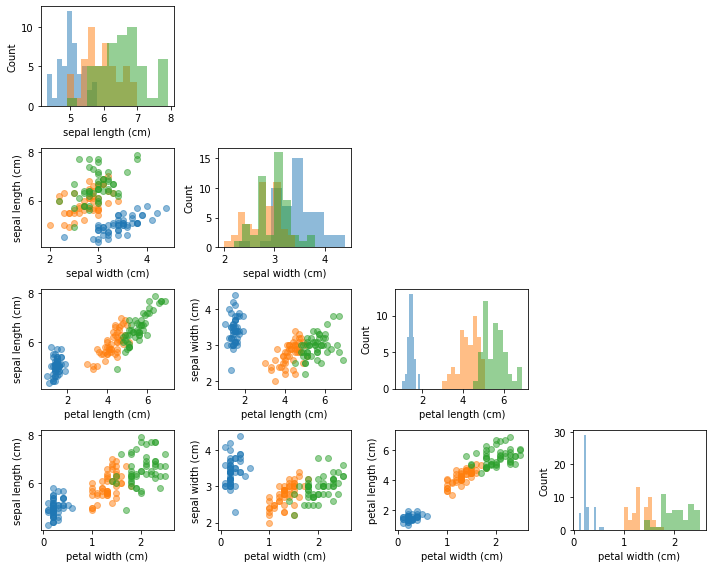

In [4]:
fig, axes = scatterplotmatrix(X[y==0], figsize=(10, 8), alpha=0.5)
fig, axes = scatterplotmatrix(X[y==1], fig_axes=(fig, axes), alpha=0.5)
fig, axes = scatterplotmatrix(X[y==2], fig_axes=(fig, axes), alpha=0.5, names=df.columns)

plt.tight_layout()
plt.show()

Looking at the graphic, it's possible to see that there is a high correlation between the petal length with the petal width. Thus,  we will assign only these two features for the matrix, X.

In [5]:
X = iris.data[:, [2, 3]]

To evaluate how well a trained model performs on unseen data, we will further split the dataset into separate training and test datasets. Using the *train_test_split* function from scikit-learn's *model_selection* module, we randomly split the X and Y arrays into 30 percent test data (45 examples) and 70 percent training data (105 examples).

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

For an optimal performance we will standardize the features of the data using the *StandardScaler* class from scikit-learn's *preprocessing* module.

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

By executing the following code, we will now implement a KNN model in scikit-learn using a Euclidian distance metric.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

To visualize the decision boundaries for two-dimensional datasets

In [11]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None,
 resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl, edgecolor='black')
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',s=100, label='test set')

To specify the indices of the examples that we want to mark on the
resulting plots.

In [12]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

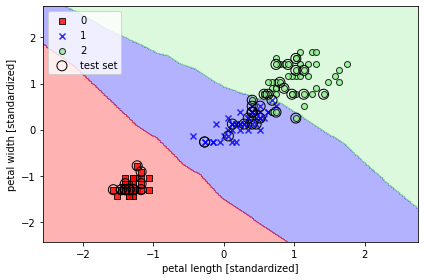

In [13]:
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Measuring model performance

Now, we need to figure out how to measure the model performance. In classification problems, accuracy is a commonly-used metric. The accuracy of a classifier is defined as the number of correct predictions divided by the total number of data points.

We can compute the accuracy on both data used to fit the classifier and the test set but, for the data used to fit the classifier, the perfomance will not be indicative of how well it can generalize to unseen data.

In [14]:
y_pred = knn.predict(X_test_std)
acc_train=knn.score(X_train_std,y_train).round(2)
acc_test=knn.score(X_test_std, y_test).round(2)
print("The accuracy for the train data is {} and for the test data is {}.".format(acc_train,acc_test))

The accuracy for the train data is 0.98 and for the test data is 0.91.


To know *k* boundary to our date we can plot a model complexity curve, that can indicate us the best perfomance on the test.

In [15]:
def plot_graph(X_train,X_test,y_train,y_test):
    # Setup arrays to store train and test accuracies
    neighbors = np.arange(1, 9)
    train_accuracy = np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))
    for i,k in enumerate(neighbors):
        # Setup a k-NN Classifier with k neighbors: knn
        knn = KNeighborsClassifier(n_neighbors=k)

        # Fit the classifier to the training data
        knn.fit(X_train,y_train)

        #Compute accuracy on the training set
        train_accuracy[i] = knn.score(X_train_std, y_train)

        #Compute accuracy on the testing set
        test_accuracy[i] = knn.score(X_test_std, y_test)

    # Generate plot
    plt.title('k-NN: Varying Number of Neighbors')
    plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
    plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
    plt.legend()
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Accuracy')
    plt.show()

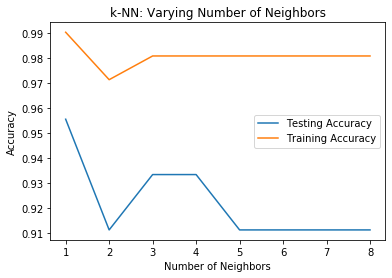

In [16]:
plot_graph(X_train_std,X_test_std,y_train,y_test)

## 2. Regression

A second type of supervised learning is the prediction of **continuous** outcomes, which is also called regression analysis. In regression analysis, we are given a number of predictor (**explanatory**) variables and a continuous response variable (**outcome**), and we try to find a relationship between those variables that allows us to predict an outcome. 

### Linear Regression

The goal of linear regression is to model the relationship between one or multiple features and a continuous target variable.

In a simple (**univariate**) linear regression the goal is to model the relationship between a single feature (**explanatory variable**, *x*) and a continuous-valued **target** (**response variable**,*y*). The equation of a linear model with one explanatory variable is defined as follows:

\begin{equation}
    y = \beta_{0} + \beta_{1}x_{1} + \epsilon
\end{equation}

where,

- $x_{1}$ = explanatory variable
- y = response variable
- $\beta_{0}$ = *y* axis intercept
- $\beta_{1}$ = associated parameter
- $\epsilon$ = residual

Based on this equation, linear regression can be understood as fiding the best-fitting straight line (i.e., $\beta_{0}$ and $\beta_{1}$ values) throught the training examples.

### Multiple linear regression

Of course, we can also generalize the linear regression model to **multiple explanatory variables**; this process is called **multiple linear regression**:

\begin{equation}
    y = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + ... + \beta_{p}x_{p} + \epsilon
\end{equation}

where,

- $x_{1}$...$x_{p}$ = explanatory variables
- y = response variable
- $\beta_{0}$ = *y* axis intercept
- $\beta_{1}$...$\beta_{p}$ = associated parameters
- $\epsilon$ = residual

## Exploratory Data Analysis - The Housing dataset

In [17]:
boston = datasets.load_boston()
print(boston['DESCR'][21:-1078])

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by 

To confirm that the dataset was loaded successfully, we can display the first five lines of the dataset (as a pandas dataframe)

In [18]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df = pd.concat([df,pd.DataFrame({'MEDV':boston.target})],axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


First, we will create a scatterplot matrix that allows us to visualize the pair-wise correlations between the different features in this dataset in one place, providing us a useful graphical summary of the relationships in a dataset.

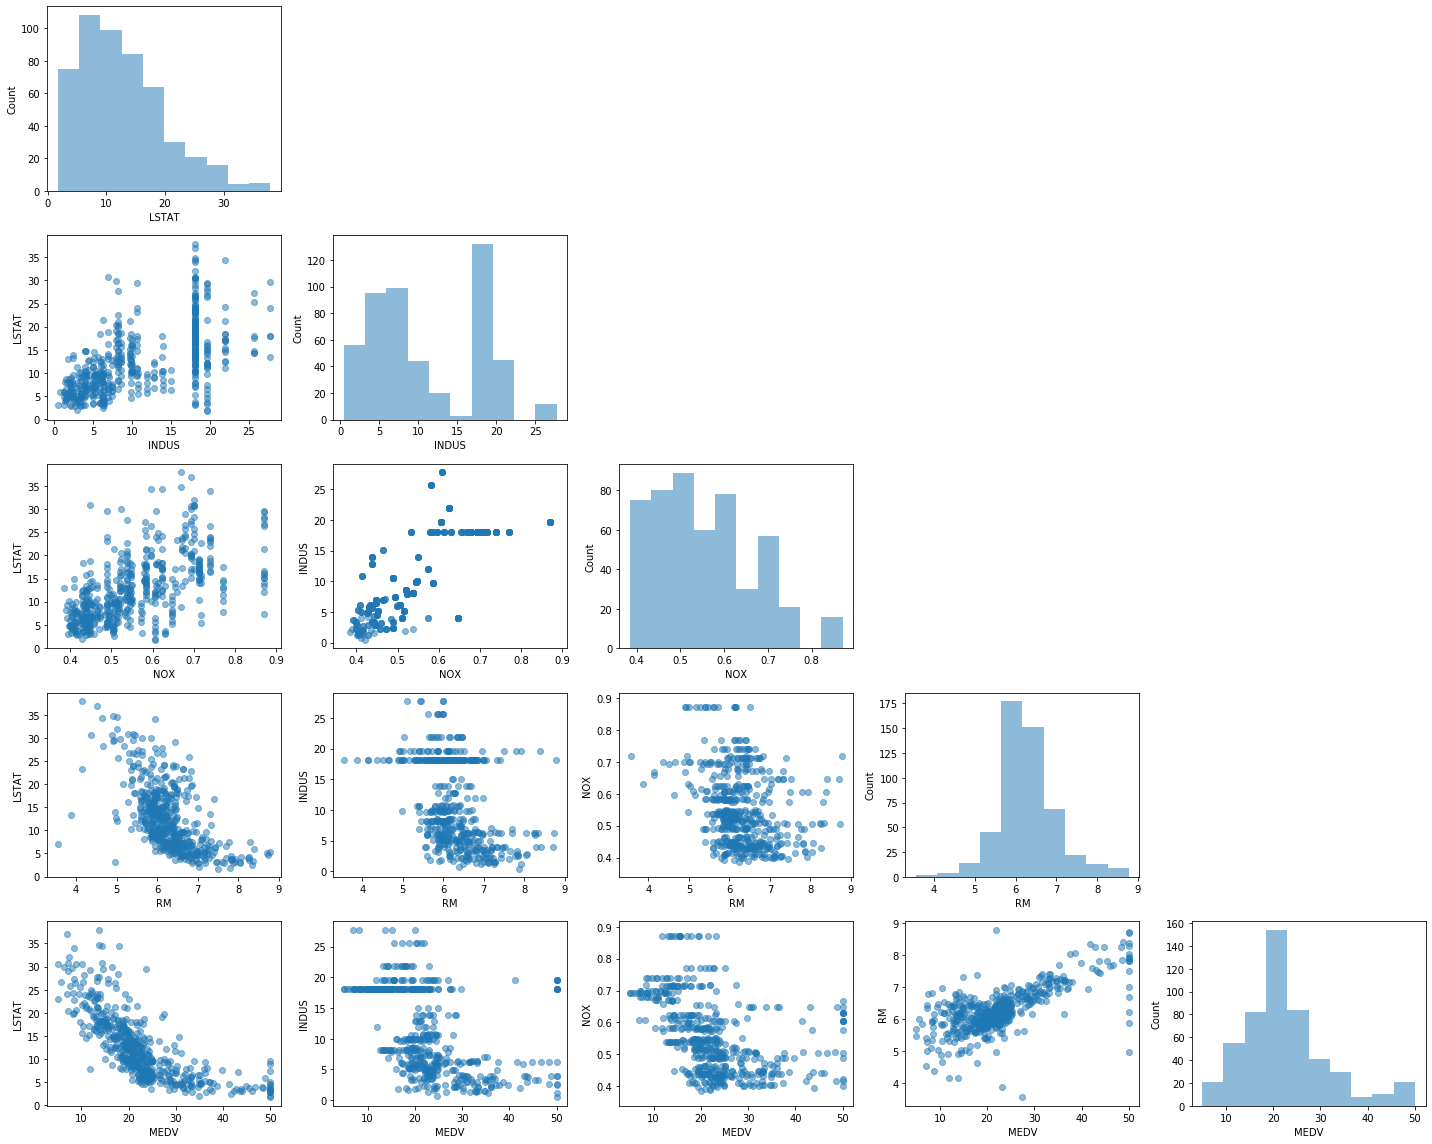

In [19]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
scatterplotmatrix(df[cols].values,figsize=(20, 16),names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

We can now quickly eyeball how the data is distributed and whether it contains outliers. For example, we can see that there is a linear relationship between RM and house prices, MEDV (the fifth column of the fourth row). Furthermore, we can see in the histogram—the lower-right subplot in the scatterplot matrix—that the MEDV variable seems to be normally distributed but contains several outliers.

Now, we can look at the relationships using a correlation matrix, which is a square matrix that contains the **Pearson product-moment** correlation coefficient (often abbreviated as **Pearson's r**), which measures the linear dependence between pairs of features. 
The correlation coefficients are in the range –1 to 1. Two features have a perfect positive correlation if r = 1,
no correlation if r = 0, and a perfect negative correlation if r = –1. 

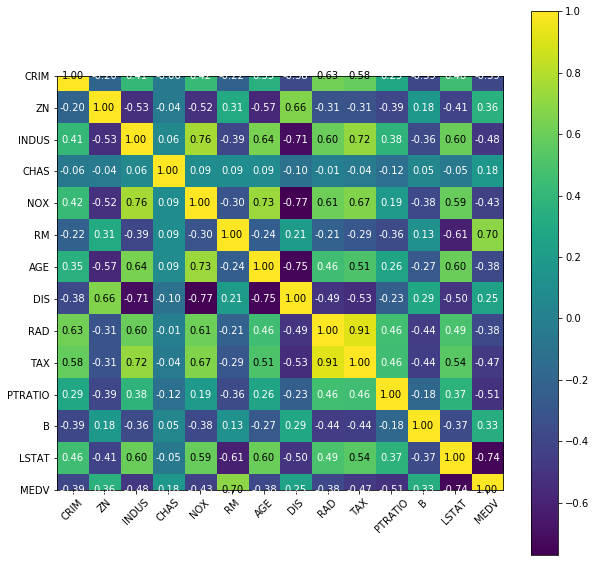

In [20]:
cm = np.corrcoef(df.values.T)
hm = heatmap(cm, row_names=df.columns, column_names=df.columns,figsize=(10,10))
plt.show()